<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/13_preliz.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(preliz-notebook)=
# Scegliere le distribuzioni a priori

La definizione delle distribuzioni a priori si riferisce al processo di trasformazione della conoscenza di un particolare dominio in distribuzioni di probabilità. Specificare dei distribuzioni a priori utili è un aspetto centrale della statistica bayesiana. PreliZ è un pacchetto Python progettato per assistere i ricercatori nella scelta delle distribuzioni a priori, fornendo una serie di strumenti per le varie operazioni necessarie per la definizione delle distribuzioini a priori. C

Nell'ambiente virtuale in cui è installato PyMC, possiamo installare PreliZ nel modo seguente:

```bash
pip install "preliz[full,lab]"
```

## Preparazione del Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import pymc.sampling_jax
import scipy.stats as stats
import preliz as pz
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

## Applicazioni

Con PreliZ possiamo generare un grafico della funzione di densità di una data distribuzione. Per esempio

<Axes: >

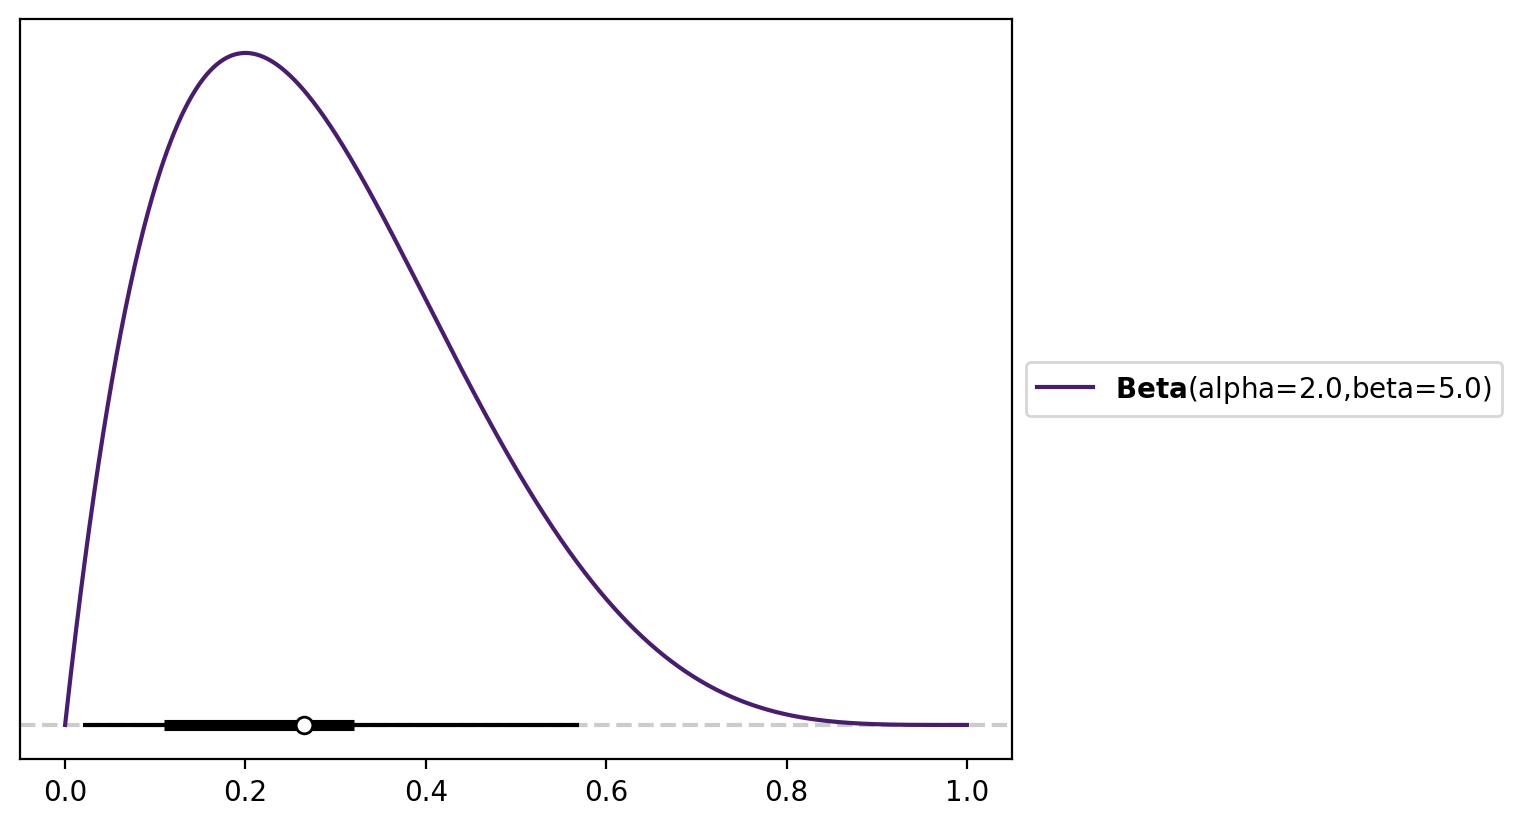

In [3]:
pz.Beta(2, 5).plot_pdf(pointinterval=True)

Abbiamo ottenuto la PDF in blu, e poiché abbiamo passato l'argomento `pointinterval=True` abbiamo ottenuto anche un elemento simile a un box-plot nella parte inferiore, che potrebbe aiutarci a interpretare cosa significa effettivamente un Beta(2, 5). Il punto bianco rappresenta la mediana, la linea più spessa rappresenta l'intervallo interquartile, ossia l'intervallo definito dai quantili 0.25 e 0.75 (o in altre parole il 50% centrale della distribuzione) e la linea più sottile rappresenta l'intervallo definito dai quantili 0.05 e 0.95.

Generiamo qui sotto la PDF della Normale(100, 15):

<Axes: >

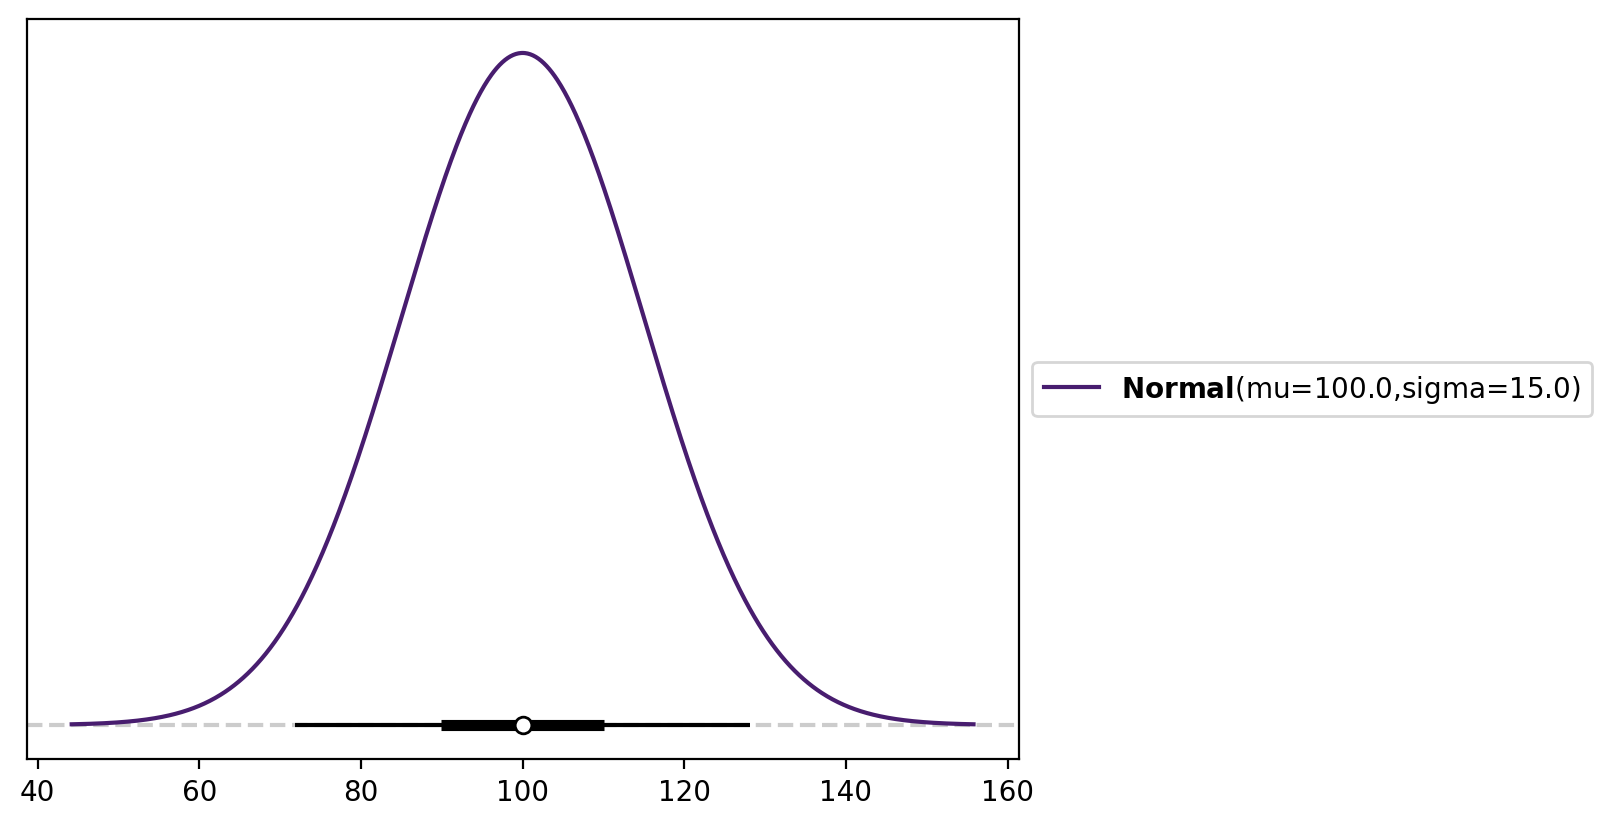

In [4]:
pz.Normal(100, 15).plot_pdf(pointinterval=True)

Esaminiamo delle distribuzioni discrete.

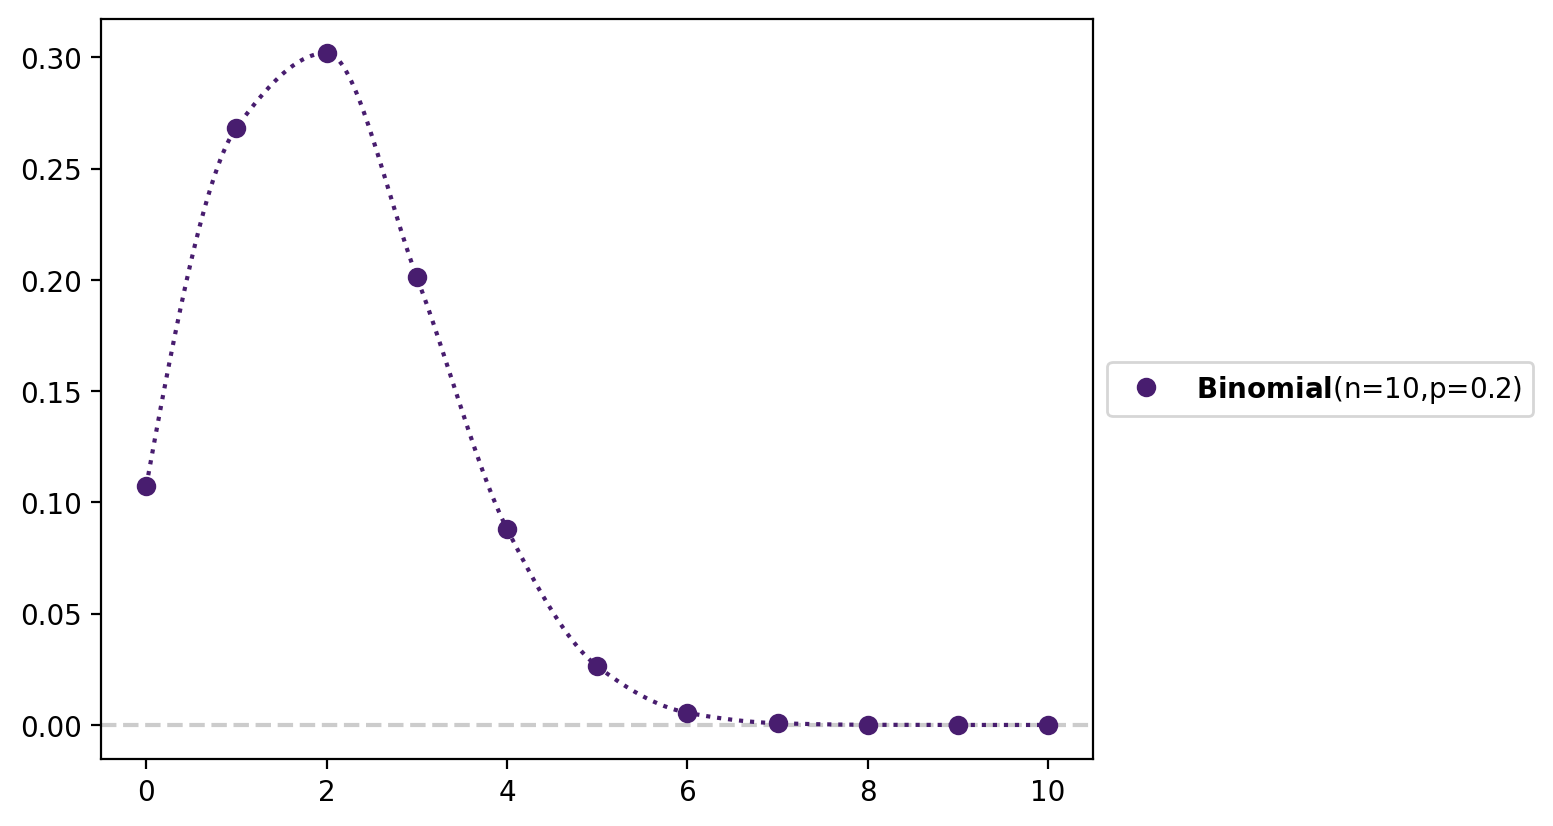

In [5]:
pz.Binomial(10, 0.2).plot_pdf();

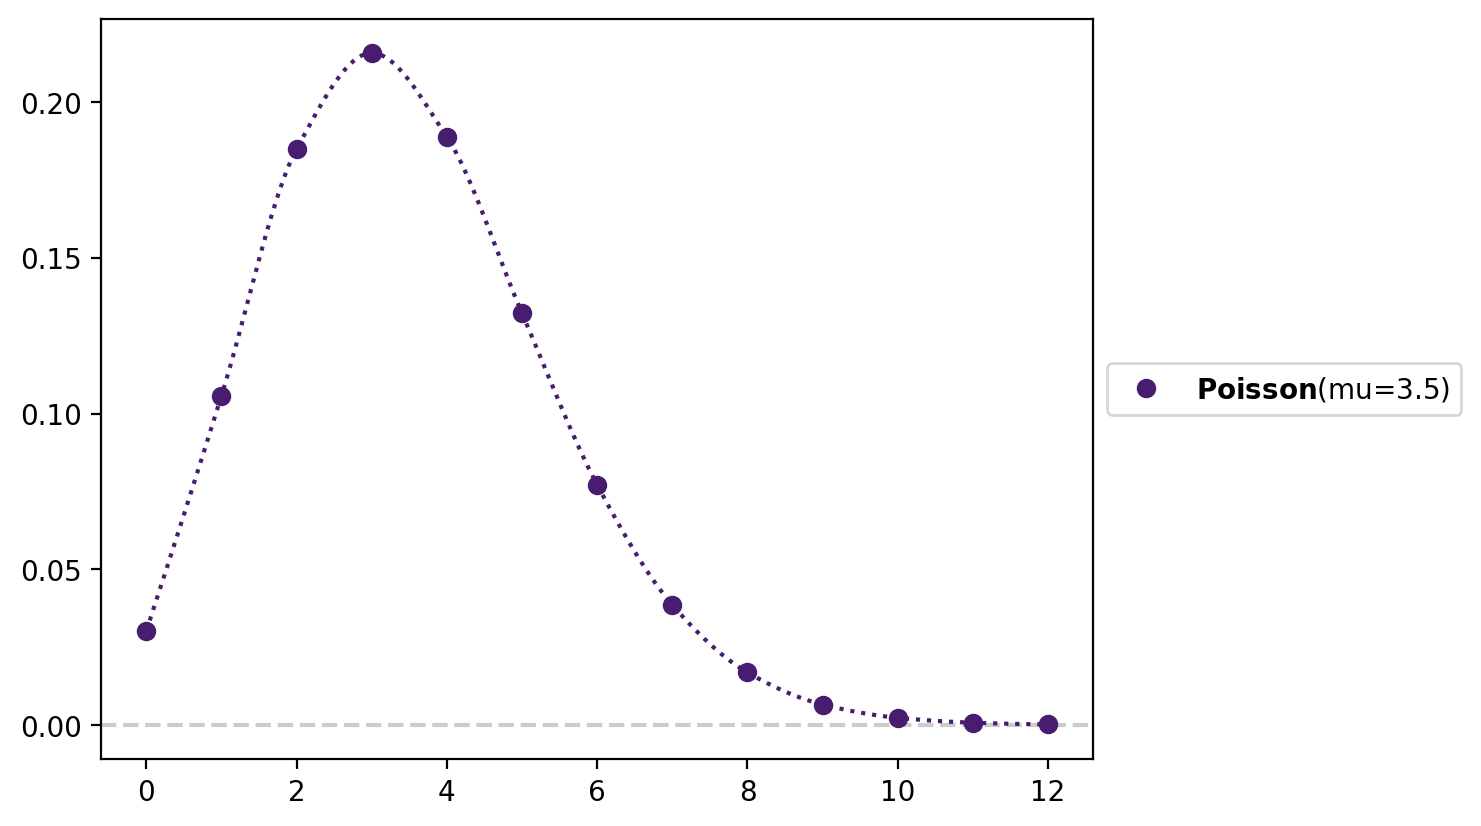

In [6]:
pz.Poisson(3.5).plot_pdf();

Possiamo includere più di una distribuzione nello stesso grafico. Questo può essere utile per confrontare l'impatto dei parametri su una data distribuzione o anche su distribuzioni diverse.

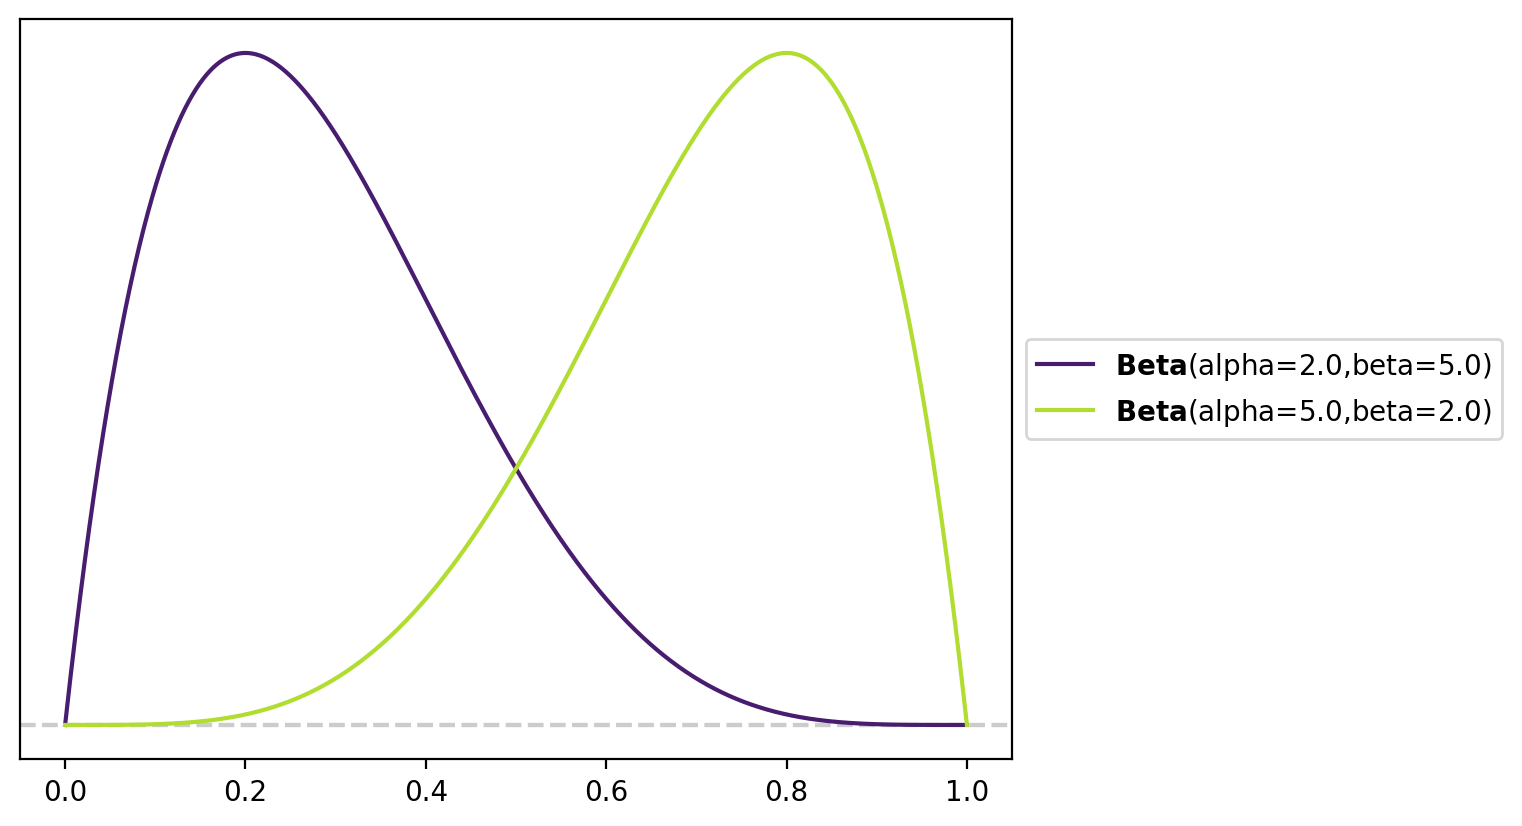

In [8]:
pz.Beta(2, 5).plot_pdf()
pz.Beta(5, 2).plot_pdf(color="C3");

Possiamo creare la CDF:

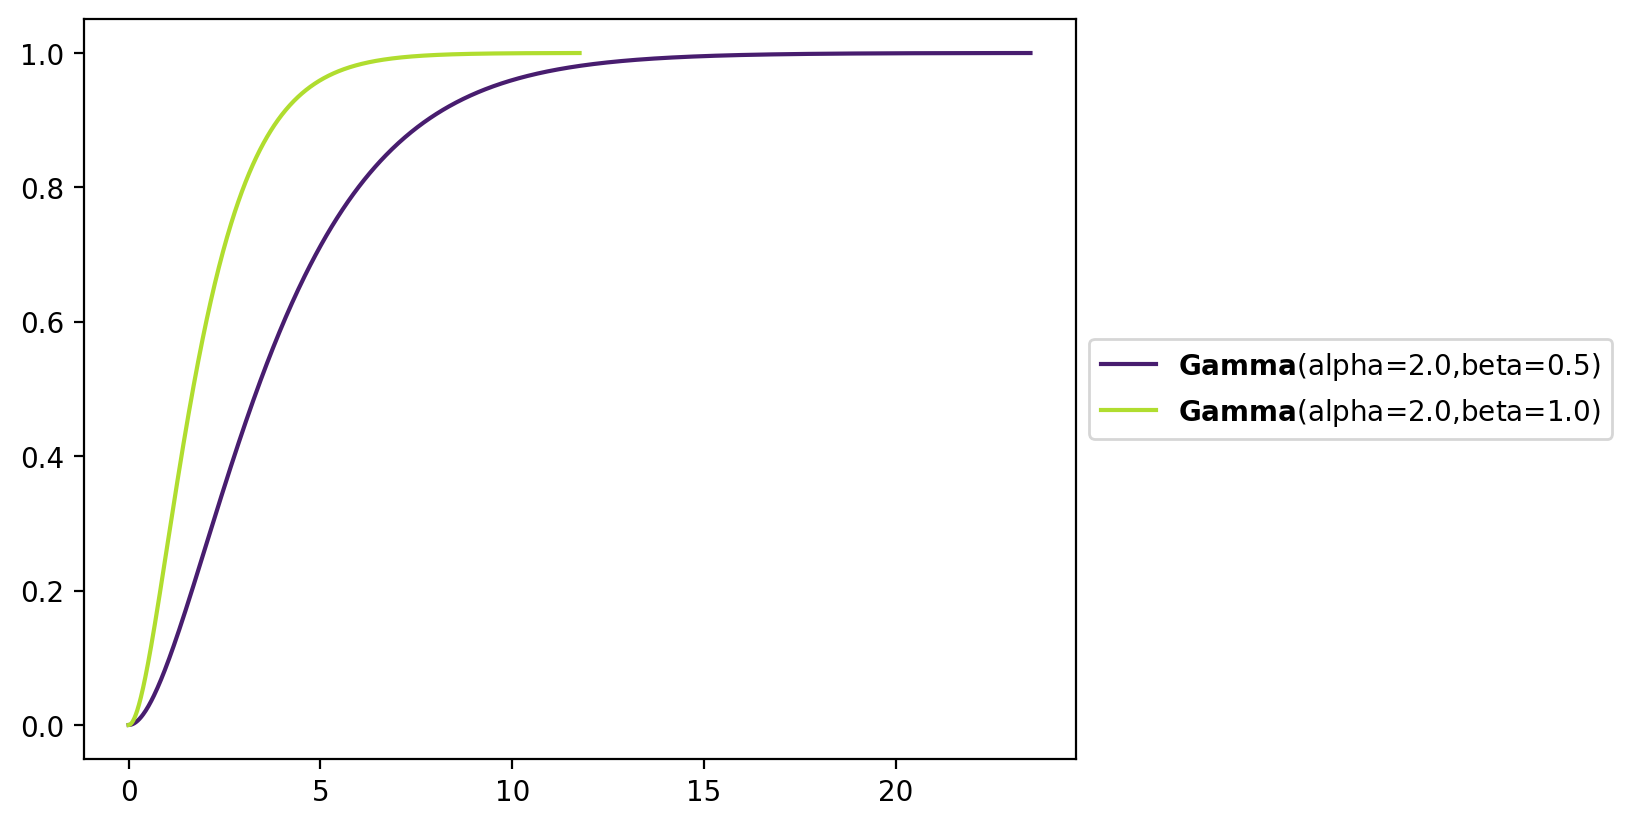

In [9]:
pz.Gamma(2, 0.5).plot_cdf()
pz.Gamma(2, 1).plot_cdf(color="C3");

È possibile creare un grafico interattivo.

In [11]:
pz.Beta().plot_interactive()

interactive(children=(FloatSlider(value=2.0, description='alpha (0, inf)', max=12.0, min=2.220446049250313e-16…

Le distribuzioni di PreliZ sono dei wrappers delle  distribuzioni SciPy. Pertanto, possiamo "congelare" una funzione SciPy e poi calolare varie proprietà della distribuzione.

<Axes: >

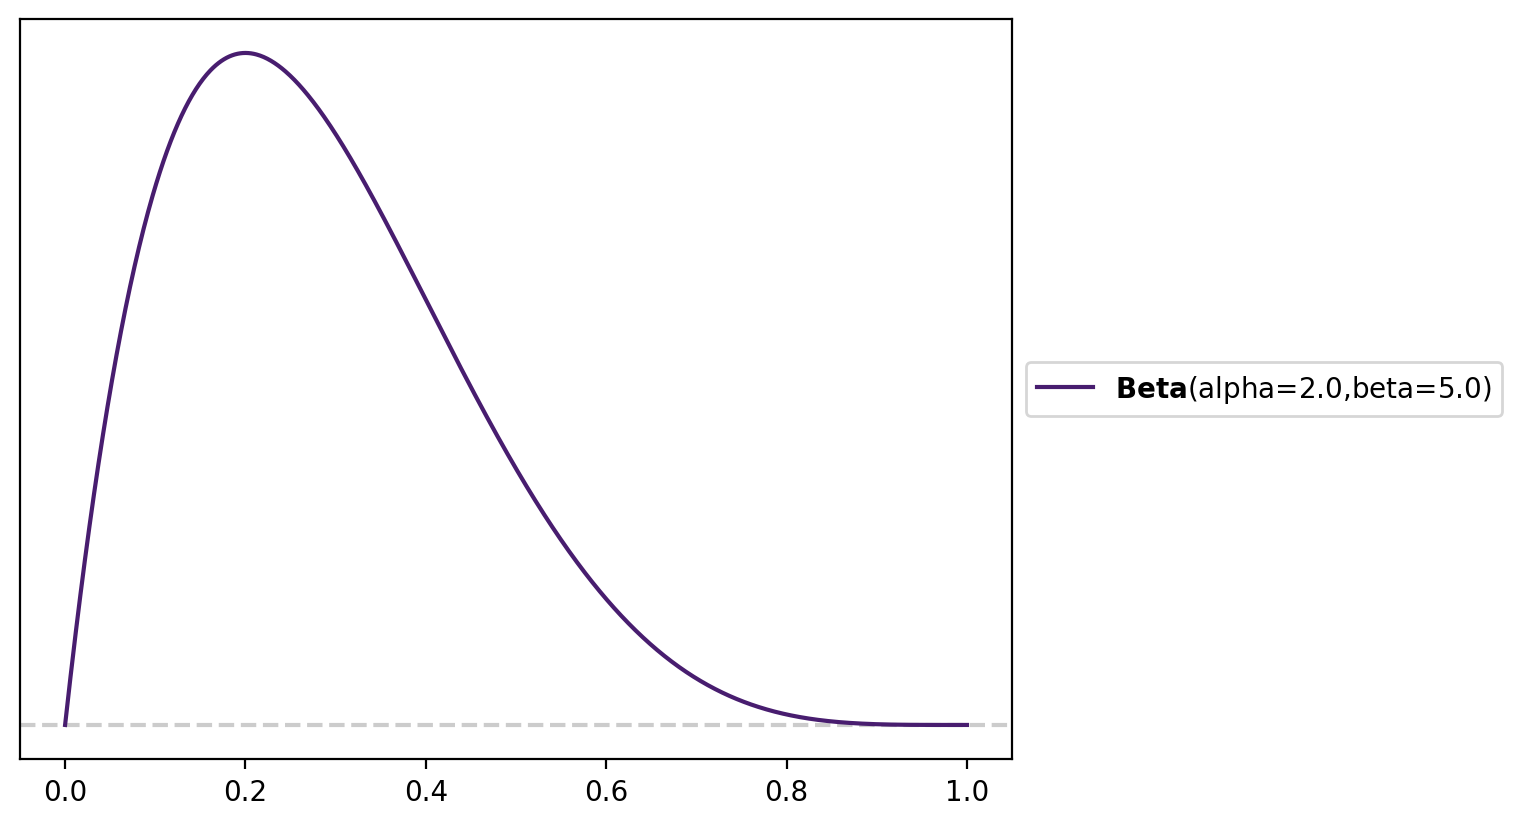

In [14]:
dist = pz.Beta(2, 5)
dist.plot_pdf()

Ad esempio, calcoliamo la media, la mediana, la deviazione standard, l'intervallo che contiene il 95% dell'area sottesa alla funzione.

In [15]:
dist.summary()

Beta(mean=0.29, median=0.26, std=0.16, lower=0.05, upper=0.63)

Calcoliamo l'intervallo a code ugualie o a più alta densità.

In [16]:
dist.eti(), dist.hdi()

((0.05, 0.63), (0.02, 0.57))

Generiamo dei valori casuali dalla distribuzione.

In [17]:
dist.rvs(10)

array([0.26945963, 0.11192815, 0.73949522, 0.36171116, 0.70088142,
       0.18099464, 0.12745493, 0.2458155 , 0.17703744, 0.08130133])

Troviamo i quantili della distribuzione.

In [18]:
dist.ppf([0.1, 0.5, 0.9])

array([0.09259526, 0.26444998, 0.51031631])

Possiamo trovare, ad esempio, la distribuzione Gamma con media 4 e tale per cui il 90% della massa della distribuzione sia contenuta tra 1 e 10:

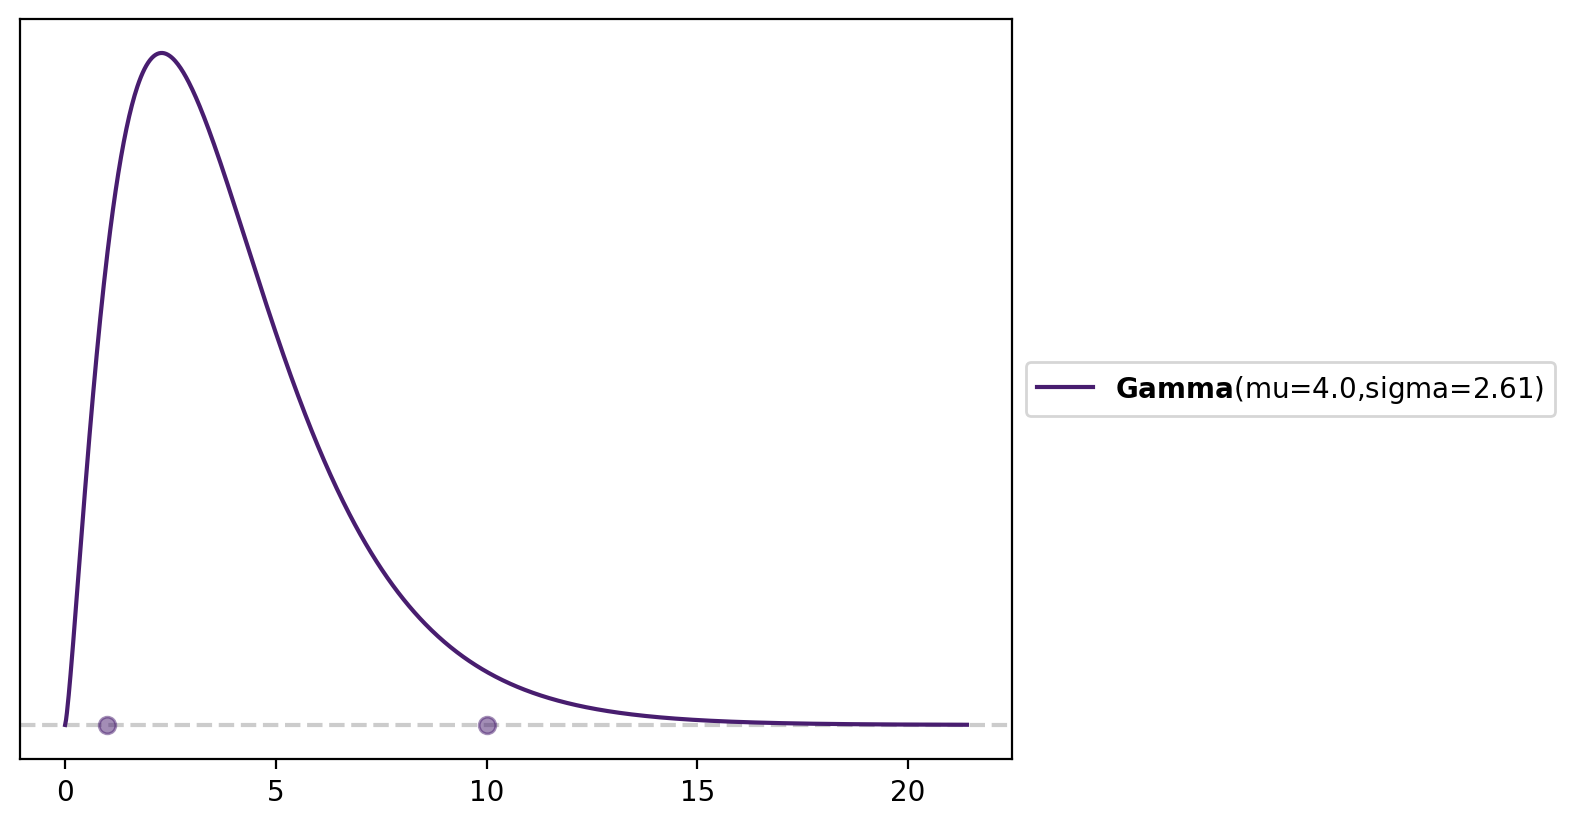

In [20]:
pz.maxent(pz.Gamma(mu=4), 1, 10, 0.9);

Per trovare i parametri della distribuzione, poi, usiamo `dist`.

(2.341680163267631, 0.5854200408169078)

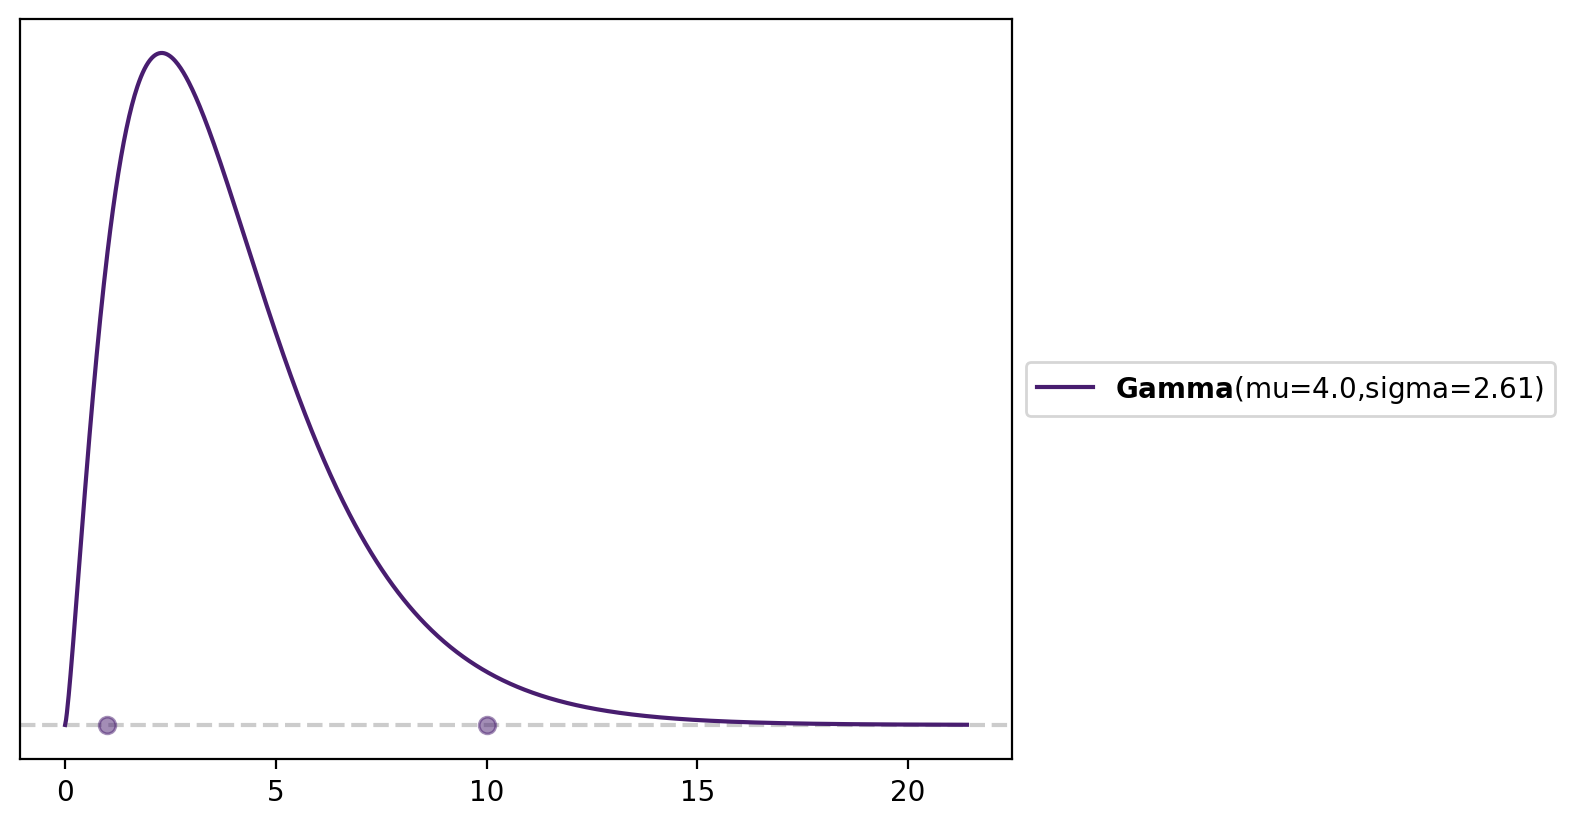

In [21]:
# update della distribuzione
dist = pz.Gamma(mu=4)
pz.maxent(dist, 1, 10, 0.9);
# ottengo i parametri della distribuzione
dist.alpha, dist.beta

<Axes: >

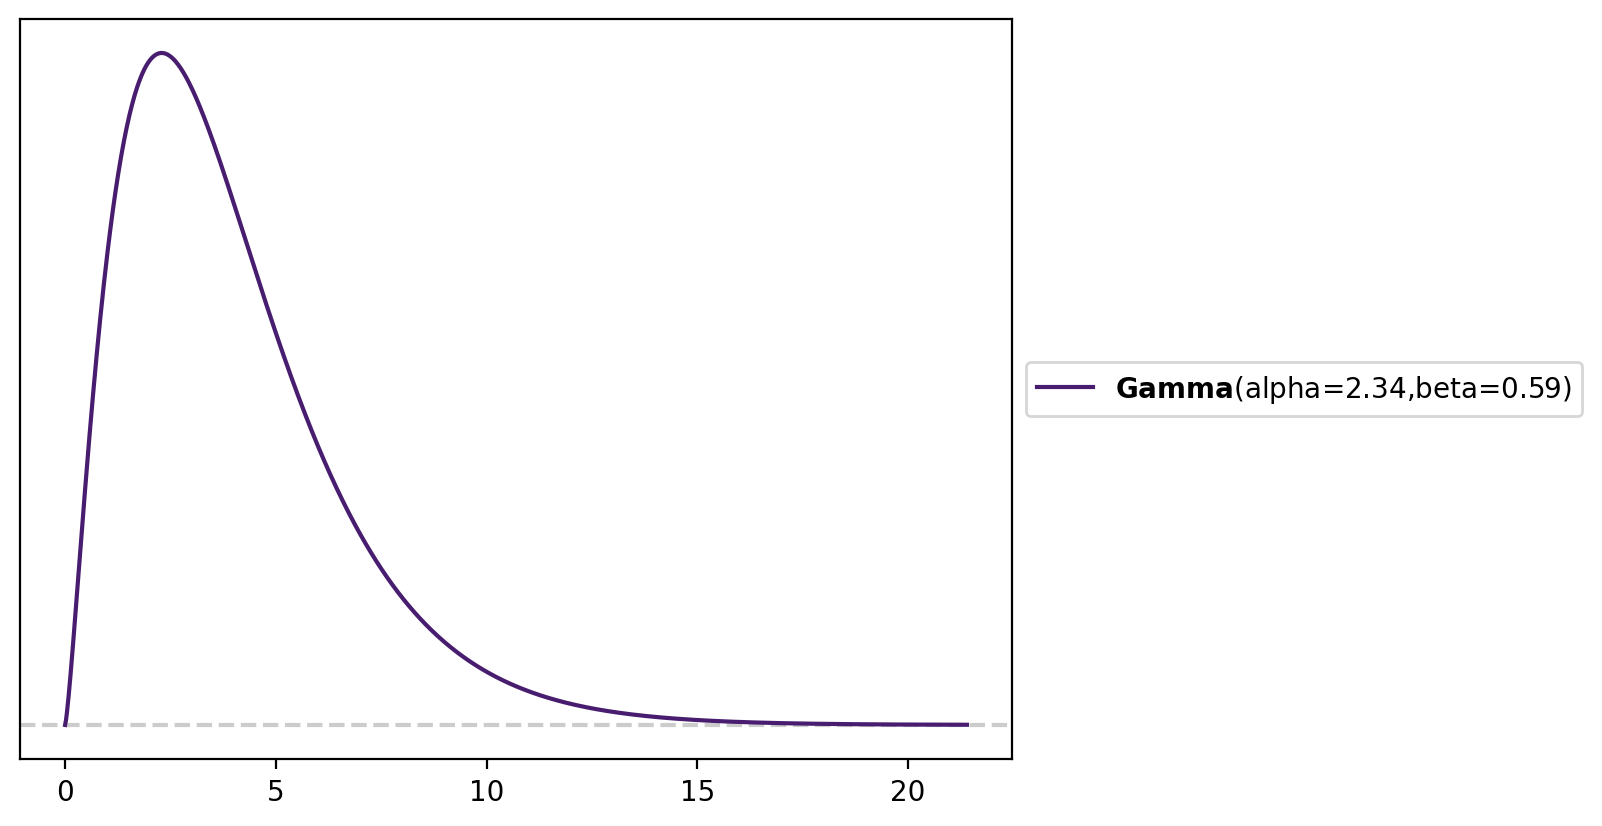

In [23]:
pz.Gamma(dist.alpha, dist.beta).plot_pdf()

## Watermark

In [19]:
%load_ext watermark
%watermark -n -u -v -iv -w -p numpyro,blackjax

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

numpyro : 0.13.0
blackjax: 0.9.6

pandas    : 2.0.3
numpy     : 1.25.2
arviz     : 0.16.0
matplotlib: 3.7.2
seaborn   : 0.12.2
scipy     : 1.10.1
pymc      : 5.6.1
preliz    : 0.3.2

Watermark: 2.4.3

